In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# **Part 1 Code**

In [11]:

def pca(X):
    # Centering the data
    mean = np.mean(X, axis=0)
    X_centered = X - mean

    # SVD
    U, S, Vt = np.linalg.svd(X_centered)
    eigenvalues = S**2 / (len(X) - 1)
    vectors = Vt.T

    return mean, eigenvalues, vectors


Comments:

The pca function performs Principal Component Analysis (PCA) on a dataset X by first centering the data around the origin (subtracting the mean of each feature). It then applies Singular Value Decomposition (SVD) to the centered data, extracting the left singular vectors (U), singular values (S), and right singular vectors (Vt). The function squares the singular values to compute the eigenvalues of the covariance matrix, which represent the variance captured by each principal component. The right singular vectors (Vt.T), representing the principal components, are then returned along with the mean and eigenvalues.

# **Part 2 Code**

In [12]:

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Select a random subset of 1000 images from the training set
np.random.seed(1234)
indices = np.random.choice(X_train.shape[0], 1000, replace=False)
X_train_sub = X_train[indices]
y_train_sub = y_train[indices]


In [16]:
# Perform PCA
mean, ev, vectors = pca(X_train_sub)

# print("MEAN:")
# print(mean)
# print("EIGEN VALUES:")
# print(ev)
# print("VECTORS:")
# print(vectors)

# Project data
X_projected = (X_train_sub - mean) @ vectors



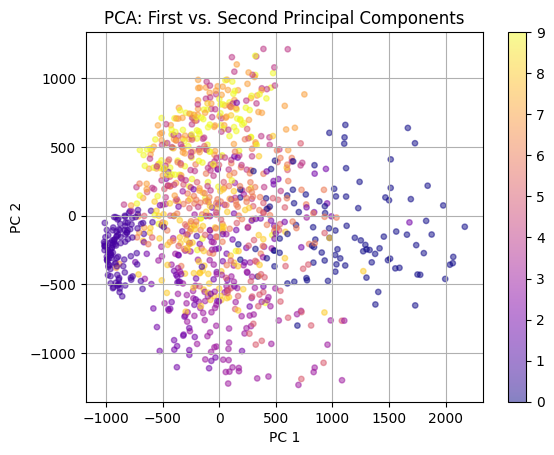

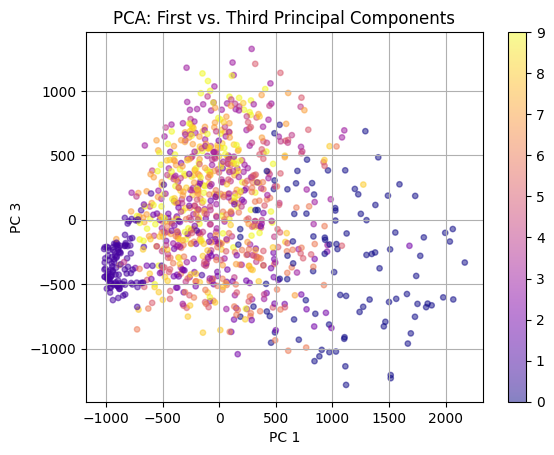

In [14]:
# plot_pca directly use the projected matrix X_projected, which is derived solely from the sampled subset (X_train_sub).
# Therefore, any plot from this code will only reflect the 1000 randomly selected images.

# Plotting function
def plot_pca(X_projected, y, components, title):
    plt.figure()
    scatter = plt.scatter(X_projected[:, components[0]], X_projected[:, components[1]], c=y, cmap='plasma', s=15, alpha=0.5)
    plt.title(title)
    plt.xlabel(f"PC {components[0]+1}")
    plt.ylabel(f"PC {components[1]+1}")
    plt.colorbar(scatter)
    plt.grid(True)
    plt.show()

plot_pca(X_projected, y_train_sub, (0, 1), "PCA: First vs. Second Principal Components")
plot_pca(X_projected, y_train_sub, (0, 2), "PCA: First vs. Third Principal Components")


# **Comment about plots:**

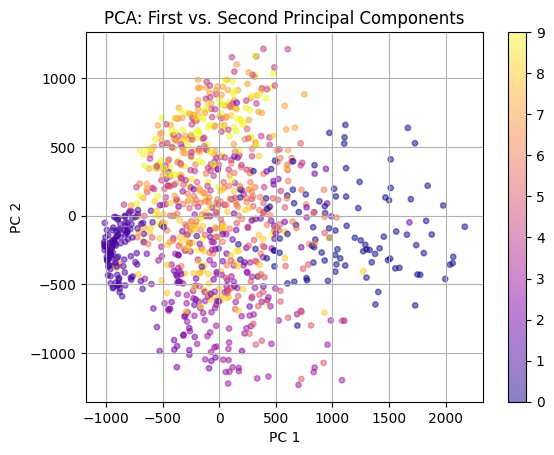

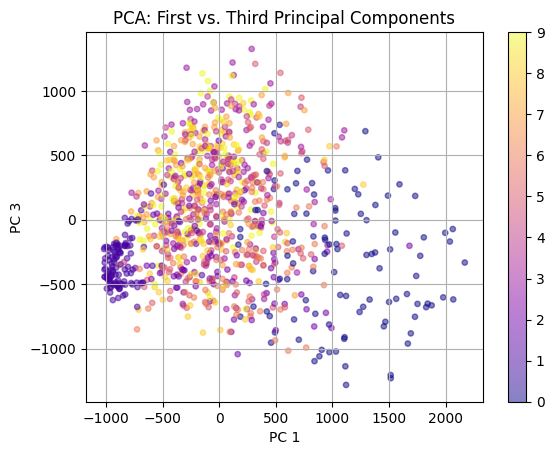

**First vs. Second Principal Components Plot:**

PC 1: Represents the first principal component which captures the highest variance within the dataset.

PC 2: Represents the second principal component which captures the second highest variance, orthogonal to the first.

Observations: The plot shows some clustering of similar digits, particularly noticeable with digit '0' (in dark purple), which tends to cluster towards the bottom left.

**First vs. Third Principal Components Plot:**

PC 1: As before, this axis captures the most significant variance.

PC 3: Represents the third principal component, capturing the next level of variance, also orthogonal to PC 1 and PC 2.

Observations: This plot also shows clustering, especially for digit '0'. The visualization shows that digits such as '1' and '7' are similar in the PCA space, as seen in the center cluster.


In [17]:
def rf_with_pca(X, y, num_components):
    X_reduced = X[:, :num_components]
    clf = RandomForestClassifier(n_estimators=100, random_state=123)
    scores = cross_val_score(clf, X_reduced, y, cv=5)
    print(f"Accuracy with {num_components} components: {np.mean(scores):.4f}")

# Testing with different numbers of principal components
for components in [20, 50, 150, 250]:
    rf_with_pca(X_projected, y_train_sub, components)


Accuracy with 20 components: 0.8640
Accuracy with 50 components: 0.8570
Accuracy with 150 components: 0.8240
Accuracy with 250 components: 0.8020


# **Comments:**

Data Loading and Preprocessing:
The MNIST dataset is loaded using keras.datasets.mnist, which provides a standard set of hand-written digit images split into training and test sets.

Subsampling:
A subset of 1000 random images is selected from the training data. This is done to reduce computational load and focus on a manageable number of samples for PCA and subsequent analysis.

Principal Component Analysis (PCA):
PCA is performed on the subset of 1000 training images using the pca function that I implemented. This function returns the mean of the subset, eigenvalues, and principal component vectors.

`X_projected = (X_train_sub - mean) @ vectors`

The training subset is then projected (matrix multiplication) onto the principal component space, resulting in new coordinates that are a linear transformation of the original data, giving variance.
The result is that each data point in X_train_sub is now described not by its original features (pixels in the case of images), but by its coordinates in terms of how much it aligns with each principal component. The first coordinate will correspond to the first principal component (which gives the most variance), the second coordinate to the second principal component, and so on. We can capture this by looking the order of the vector from up to the top.

Visualization:
A plotting function, plot_pca, is defined and used to visualize the data projected onto the first two and first three principal components(PC1, PC2, PC3). These plots help to visually assess how well different digits (variances) are separated in the PCA-transformed space.

Classification with RF:
A RF is used to classify digits based on their PCA-reduced features. The classification is done with different numbers of principal components (20, 50, 150, 250) to investigate how the number of components affects classification accuracy.
Cross-validation (5-fold) is performed for each case to estimate the model's performance.

*With the accuracy results I can say that, it would be better to use around 20 principal components for this classification task. When too many components are used, the model may start to overfit. This results in poorer performance when the model is tested on new, unseen data.*